In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def show_image(fname, path='./image/', size=(20,20)):
    """读取*.png图片并显示"""
    plt.figure(figsize=size)
    plt.imshow(plt.imread(path+fname))
    plt.axis('off')
    plt.show()

In [3]:
def show_describe(data):
    """输出数据的基本信息"""
    _mean = 0.0 if data.mean() < 1e-11 else  data.mean()
    _std = data.std()
    _min = data.min()
    _max = data.max()
    _norm_1 = np.linalg.norm(data, ord=1)
    _norm_2 = np.linalg.norm(data, ord=2)
    if 1-_norm_2 < 1e-11: _norm_2 = 1.0
    print('mean={0}, std={1},'.format(_mean, _std,))
    print('min={0}, max={1},'.format(_min, _max,))
    print('l1_norm={0}, l2_norm={1}'.format(_norm_1, _norm_2))    

# 特征工程是什么？

有这么一句话在业界广泛流传：数据和特征决定了机器学习的上限，而模型和算法只是逼近这个上限而已。那特征工程到底是什么呢？顾名思义，其本质是一项工程活动，目的是最大限度地从原始数据中提取特征以供算法和模型使用。通过总结和归纳，人们认为特征工程包括以下方面：

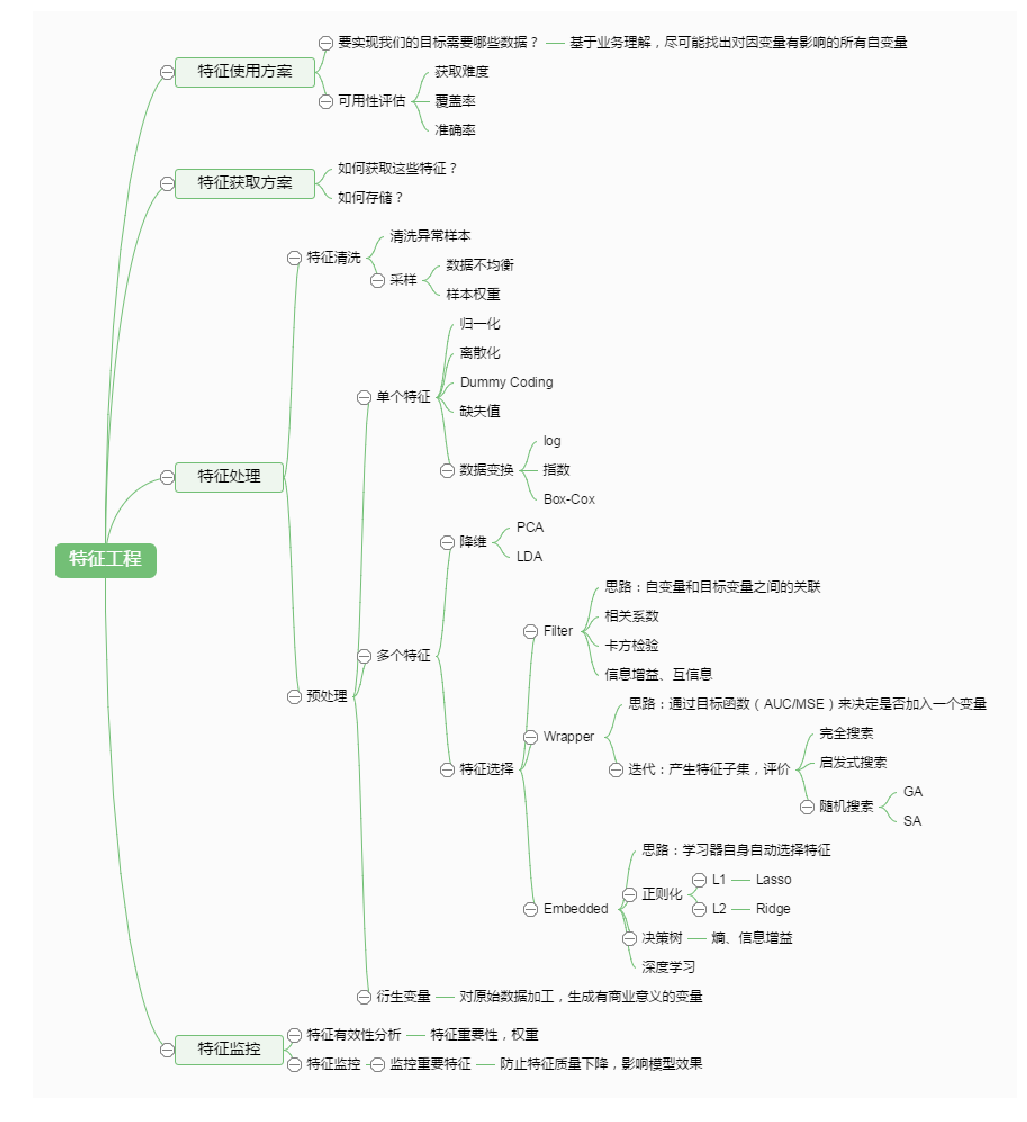

In [4]:
show_image('feature_engineering.png')

特征处理是特征工程的核心部分，sklearn提供了较为完整的特征处理方法，包括数据预处理，特征选择，降维等。首次接触到sklearn，通常会被其丰富且方便的算法模型库吸引，但是这里介绍的特征处理库也十分强大！

本文中使用sklearn中的IRIS（鸢尾花）数据集来对特征处理功能进行说明。IRIS数据集由Fisher在1936年整理，包含4个特征（Sepal.Length（花萼长度）、Sepal.Width（花萼宽度）、Petal.Length（花瓣长度）、Petal.Width（花瓣宽度）），特征值都为正浮点数，单位为厘米。目标值为鸢尾花的分类（Iris Setosa（山鸢尾）、Iris Versicolour（杂色鸢尾），Iris Virginica（维吉尼亚鸢尾））。导入IRIS数据集的代码如下：

In [5]:
from sklearn.datasets import load_iris
#导入IRIS数据集
iris = load_iris()
#特征矩阵
print(iris.data[:5])
#目标向量
print(iris.target[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


# 3 数据预处理

通过特征提取，我们能得到未经处理的特征，这时的特征可能有以下问题：

* 不属于同一量纲：即特征的规格不一样，不能够放在一起比较。无量纲化可以解决这一问题。
* 信息冗余：对于某些定量特征，其包含的有效信息为区间划分，例如学习成绩，假若只关心“及格”或不“及格”，那么需要将定量的考分，转换成“1”和“0”表示及格和未及格。二值化可以解决这一问题。
* 定性特征不能直接使用：某些机器学习算法和模型只能接受定量特征的输入，那么需要将定性特征转换为定量特征。最简单的方式是为每一种定性值指定一个定量值，但是这种方式过于灵活，增加了调参的工作。通常使用哑编码的方式将定性特征转换为定量特征：假设有N种定性值，则将这一个特征扩展为N种特征，当原始特征值为第i种定性值时，第i个扩展特征赋值为1，其他扩展特征赋值为0。哑编码的方式相比直接指定的方式，不用增加调参的工作，对于线性模型来说，使用哑编码后的特征可达到非线性的效果。
* 存在缺失值：缺失值需要补充。
* 信息利用率低：不同的机器学习算法和模型对数据中信息的利用是不同的，之前提到在线性模型中，使用对定性特征哑编码可以达到非线性的效果。类似地，对定量变量多项式化，或者进行其他的转换，都能达到非线性的效果。

我们使用sklearn中的preproccessing库来进行数据预处理，可以覆盖以上问题的解决方案。

## 3.1 无量纲化

无量纲化使不同规格的数据转换到**同一规格**。常见的无量纲化方法有**标准化, 区间缩放和正则化**。   
* **标准化**的前提是特征值服从正态分布，标准化后，其转换成标准正态分布。   
* **区间缩放法**利用了边界值信息，将特征的取值区间缩放到某个特点的范围，例如\[0, 1\]等。
* **正则化**的过程是将`每个样本`缩放到单位范数（每个样本的范数为1），如果后面要使用如二次型（点积）或者其它核方法计算两个样本之间的相似性这个方法会很有用。

### 3.1.1 标准化
标准化需要计算特征的均值($\mu$)和标准差$(S)$，公式表达为： 
$$x = \frac{x-\mu}{S}$$
计算时对**每个特征/每列**分别进行。将数据按期属性（按列进行）减去其均值，并处以其标准差。得到的结果是，对于每个属性/每列来说所有数据都*聚集在0附近，方差为1*。   
使用preproccessing库的StandardScaler类对数据进行标准化的代码如下：

In [6]:
from sklearn.preprocessing import StandardScaler
#标准化，返回值为标准化后的数据
iris_SS = StandardScaler().fit_transform(iris.data)
print(iris.data[:5])
print(iris_SS[:5])
show_describe(iris_SS[:,0])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]
mean=0.0, std=1.0,
min=-1.87002413384702, max=2.492019202124427,
l1_norm=124.96446371755239, l2_norm=1.0


### 3.1.2 区间缩放法
区间缩放法的思路有多种，常见的一种是将属性缩放到一个指定的最大和最小值(缩放到\[0, 1\]区间)，公式表达为： 
$$x=\frac{x-x_{min}}{x_{min}-x_{max}}$$
* 对于方差非常小的属性可以增强其稳定性   

使用preproccessing库的MinMaxScaler类对数据进行区间缩放的代码如下

In [7]:
from sklearn.preprocessing import MinMaxScaler
#区间缩放，返回值为缩放到[0, 1]区间的数据
iris_01 = MinMaxScaler().fit_transform(iris.data)
print(iris.data[:5])
print(iris_01[:5])
show_describe(iris_01[:,0])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]]
mean=0.42870370370370364, std=0.2292503588292058,
min=0.0, max=1.0,
l1_norm=64.30555555555554, l2_norm=1.0


区间缩放法的思路有多种，常见的一种为利用最大值或最小值的绝对值进行缩放(缩放到\[-1, 1\]区间)，公式表达为： 
$$x=\frac{x}{abs(x)_{max}}$$
* 可以保留正负号和0元素

使用preproccessing库的MaxAbsScaler类对数据进行区间缩放的代码如下

In [8]:
from sklearn.preprocessing import MaxAbsScaler
#区间缩放，返回值为缩放到[-1, 1]区间的数据
#以最大值的abs做为区间左右端点，左右可能无法填满
tmp = iris.data.copy()
tmp[::2,:] *= -1
iris_abs_1 = MaxAbsScaler().fit_transform(tmp)
print(tmp[:5])
print(iris_abs_1[:5])
show_describe(iris_abs_1[:,3])


[[-5.1 -3.5 -1.4 -0.2]
 [ 4.9  3.   1.4  0.2]
 [-4.7 -3.2 -1.3 -0.2]
 [ 4.6  3.1  1.5  0.2]
 [-5.  -3.6 -1.4 -0.2]]
[[-0.64556962 -0.79545455 -0.20289855 -0.08      ]
 [ 0.62025316  0.68181818  0.20289855  0.08      ]
 [-0.59493671 -0.72727273 -0.1884058  -0.08      ]
 [ 0.58227848  0.70454545  0.2173913   0.08      ]
 [-0.63291139 -0.81818182 -0.20289855 -0.08      ]]
mean=0.0, std=0.5678006535943951,
min=-1.0, max=1.0,
l1_norm=71.91999999999999, l2_norm=1.0


### 3.1.3 正则化
正则化的过程是将**每个样本/每行**缩放到单位范数（每个样本/每行的范数为1），如果后面要使用如二次型（点积）或者其它核方法计算两个样本之间的相似性这个方法会很有用。

Normalization主要思想是对每个样本计算其p-范数，然后对该样本中每个元素除以该范数，这样处理的结果是使得每个处理后样本的p-范数（l1-norm,l2-norm）等于1。l2范数的归一化公式如下： 
$$x'=\frac{x}{||X||_2}$$
该方法主要应用于文本分类和聚类中。例如，对于两个TF-IDF向量的l2-norm进行点积，就可以得到这两个向量的余弦相似性。   
使用preproccessing库的Normalizer类对数据进行归一化的代码如下：

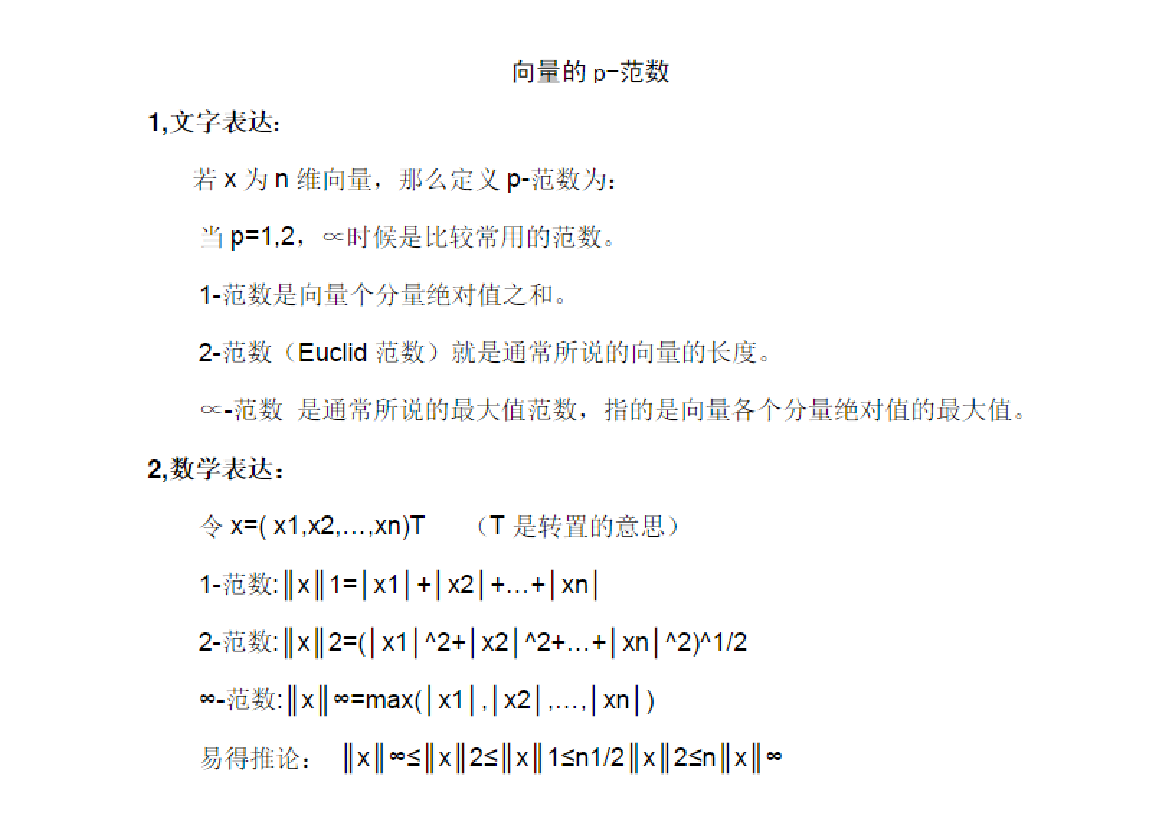

In [4]:
show_image('p_norm.png')

In [9]:
from sklearn.preprocessing import Normalizer
#归一化，返回值为归一化后的数据
iris_l2 = Normalizer().fit_transform(iris.data)
print(iris.data[:5])
print(iris_l2[:5])
show_describe(iris_l2[0,:])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[[0.80377277 0.55160877 0.22064351 0.0315205 ]
 [0.82813287 0.50702013 0.23660939 0.03380134]
 [0.80533308 0.54831188 0.2227517  0.03426949]
 [0.80003025 0.53915082 0.26087943 0.03478392]
 [0.790965   0.5694948  0.2214702  0.0316386 ]]
mean=0.40188638650769026, std=0.29746820391395,
min=0.03152050090256395, max=0.8037727730153805,
l1_norm=1.607545546030761, l2_norm=1.0


In [10]:
#归一化，返回值为归一化后的数据
iris_l1 = Normalizer('l1').fit_transform(iris.data)
print(iris.data[:5])
print(iris_l1[:5])
show_describe(iris_l1[0,:])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[[0.5        0.34313725 0.1372549  0.01960784]
 [0.51578947 0.31578947 0.14736842 0.02105263]
 [0.5        0.34042553 0.13829787 0.0212766 ]
 [0.4893617  0.32978723 0.15957447 0.0212766 ]
 [0.49019608 0.35294118 0.1372549  0.01960784]]
mean=0.25, std=0.1850449616487929,
min=0.019607843137254905, max=0.5,
l1_norm=1.0, l2_norm=0.622066356047659


## 3.2 对定量特征二值化
  
定量特征二值化的核心在于设定一个阈值，大于阈值的赋值为1，小于等于阈值的赋值为0，公式表达如下：
$$x'=\left \{
\begin{array}\\
1, & x>threshold\\
0, & x≤threshold
\end{array} \right.
$$
使用preproccessing库的Binarizer类对数据进行二值化的代码如下：

In [11]:
from sklearn.preprocessing import Binarizer
#二值化，阈值设置为3，返回值为二值化后的数据
iris_bnr = Binarizer(threshold=3).fit_transform(iris.data)
print(iris.data[:5])
print(iris_bnr[:5])
show_describe(iris_bnr[:,0])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[[1. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 1. 0. 0.]
 [1. 1. 0. 0.]
 [1. 1. 0. 0.]]
mean=1.0, std=0.0,
min=1.0, max=1.0,
l1_norm=150.0, l2_norm=1.0


## 3.3 对定性特征哑编码
由于IRIS数据集的特征皆为定量特征，故使用其目标值进行哑编码（实际上是不需要的）。使用preproccessing库的OneHotEncoder类对数据进行哑编码的代码如下：

In [12]:
from sklearn.preprocessing import OneHotEncoder
#哑编码，对IRIS数据集的目标值，返回值为哑编码后的数据
iris_ohe = OneHotEncoder().fit_transform(iris.target.reshape((-1,1)))
print(iris.target[::10])
print(iris_ohe[::10])

[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]
  (0, 0)	1.0
  (1, 0)	1.0
  (2, 0)	1.0
  (3, 0)	1.0
  (4, 0)	1.0
  (5, 1)	1.0
  (6, 1)	1.0
  (7, 1)	1.0
  (8, 1)	1.0
  (9, 1)	1.0
  (10, 2)	1.0
  (11, 2)	1.0
  (12, 2)	1.0
  (13, 2)	1.0
  (14, 2)	1.0


## 3.4 缺失值计算
由于IRIS数据集没有缺失值，故对数据集新增一个样本，4个特征均赋值为NaN，表示数据缺失。使用preproccessing库的Imputer类对数据进行缺失值计算的代码如下：

In [13]:
from sklearn.preprocessing import Imputer
#缺失值计算，返回值为计算缺失值后的数据
#参数missing_value为缺失值的表示形式，默认为NaN
#参数strategy为缺失值填充方式，默认为mean（均值）
tmp_data = np.vstack((np.array([np.nan, np.nan, np.nan, np.nan]), iris.data))
iris_fillna = Imputer().fit_transform(tmp_data)
print(tmp_data[:5])
print(iris_fillna[:5])
show_describe(iris_fillna[:,0])

[[nan nan nan nan]
 [5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]]
[[5.84333333 3.054      3.75866667 1.19866667]
 [5.1        3.5        1.4        0.2       ]
 [4.9        3.         1.4        0.2       ]
 [4.7        3.2        1.3        0.2       ]
 [4.6        3.1        1.5        0.2       ]]
mean=5.843333333333333, std=0.82256396652704,
min=4.3, max=7.9,
l1_norm=882.3433333333332, l2_norm=1.0


## 3.5 数据变换
常见的数据变换有基于多项式的、基于指数函数的、基于对数函数的。4个特征，度为2的多项式转换公式如下：
$$(c_1,c_2,c_3,c_4) \to \\
(1,c_1,c_2,c_3,c_4,\ \ c_1^2,c_1*c_2,c_1*c_3,c_1*c_4,\ \ 
c_2^2,c_2*c_3,c_2*c_4,\ \ c_3^2,c_3*c_4,\ \ c_4^2)
$$
使用preproccessing库的PolynomialFeatures类对数据进行多项式转换的代码如下：

In [14]:
from sklearn.preprocessing import PolynomialFeatures
#多项式转换
#参数degree为度，默认值为2
iris_pf = PolynomialFeatures().fit_transform(iris.data)
print(iris.data[:5])
print(iris_pf[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[[ 1.    5.1   3.5   1.4   0.2  26.01 17.85  7.14  1.02 12.25  4.9   0.7
   1.96  0.28  0.04]
 [ 1.    4.9   3.    1.4   0.2  24.01 14.7   6.86  0.98  9.    4.2   0.6
   1.96  0.28  0.04]
 [ 1.    4.7   3.2   1.3   0.2  22.09 15.04  6.11  0.94 10.24  4.16  0.64
   1.69  0.26  0.04]
 [ 1.    4.6   3.1   1.5   0.2  21.16 14.26  6.9   0.92  9.61  4.65  0.62
   2.25  0.3   0.04]
 [ 1.    5.    3.6   1.4   0.2  25.   18.    7.    1.   12.96  5.04  0.72
   1.96  0.28  0.04]]


## 3.6 自定义变换
基于单变元函数($\log\ \exp \dots$)的数据变换可以使用一个统一的方式完成，使用preproccessing库的FunctionTransformer对数据进行对数函数转换的代码如下：

In [15]:
from sklearn.preprocessing import FunctionTransformer
#自定义转换函数为对数函数的数据变换
#第一个参数是单变元函数
iris_log1p = FunctionTransformer(np.log1p).fit_transform(iris.data)
print(iris.data[:5])
print(iris_log1p[:5])
show_describe(iris_log1p[:,0])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[[1.80828877 1.5040774  0.87546874 0.18232156]
 [1.77495235 1.38629436 0.87546874 0.18232156]
 [1.74046617 1.43508453 0.83290912 0.18232156]
 [1.7227666  1.41098697 0.91629073 0.18232156]
 [1.79175947 1.5260563  0.87546874 0.18232156]]
mean=1.916063857480095, std=0.11994977727531791,
min=1.667706820558076, max=2.186051276738094,
l1_norm=287.40957862201424, l2_norm=1.0


## 3.7 回顾

|类|功能|说明|
|:-:|:-:|:-|
|StandardScaler|无量纲化|标准化，基于特征矩阵的列，将特征值转换至服从标准正态分布|
|MinMaxScaler|无量纲化|区间缩放，基于最大最小值，将特征值转换到\[0, 1\]区间上|
|Normalizer|归一化|基于特征矩阵的行，将样本向量转换为“单位向量”|
|Binarizer|二值化|基于给定阈值，将定量特征按阈值划分|
|OneHotEncoder|哑编码|将定性数据编码为定量数据|
|Imputer|缺失值计算|计算缺失值，缺失值可填充为均值等|
|PolynomialFeatures|多项式数据转换|多项式数据转换|
|FunctionTransformer|自定义单元数据转换|使用单变元的函数来转换数据|